James Irwin    
CSC 369   
02.10.2025

In [15]:
import matplotlib.pyplot as plt
import pyarrow.parquet as pq
import pyarrow.csv as pv
import matplotlib.dates
import pyarrow as pa
import pandas as pd
import polars as pl
import duckdb
import time
import sys

In [16]:
import findspark
findspark.init()

In [17]:
import pyspark
from pyspark.sql import SparkSession

In [18]:
spark = SparkSession.builder.appName("Code").getOrCreate()

df = spark.read.parquet("../assignment3/rplace.parquet")
df.createOrReplaceTempView("table")

**1. Board Activity -- Coordinates**

In [19]:
query = '''
WITH ahh AS (
SELECT x, y, count(*) AS num_placements, RANK() OVER (ORDER BY COUNT(*) DESC) AS rank
FROM table    
GROUP BY x, y
ORDER BY "num_placements" DESC
)
SELECT *
FROM ahh
WHERE x >= 53
AND x <= 92
AND y >= 468
AND y <= 528 
ORDER BY rank
LIMIT 30
'''
print(spark.sql(query).show())

25/02/10 23:57:33 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/02/10 23:57:33 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/02/10 23:57:33 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/02/10 23:57:37 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
25/02/10 23:57:38 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
25/02/10 23:57:39 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
25/02/10 23:57:40 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
25/02/10 23:57:40 WARN RowBasedKeyVal

+---+---+--------------+----+
|  x|  y|num_placements|rank|
+---+---+--------------+----+
| 73|488|          5640| 249|
| 72|488|          5324| 277|
| 81|524|          4285| 431|
| 80|488|          3890| 522|
| 72|517|          3848| 536|
| 81|526|          3716| 567|
| 72|487|          3089| 808|
| 81|488|          3001| 842|
| 80|489|          2959| 866|
| 73|487|          2936| 883|
| 72|516|          2866| 933|
| 63|523|          2724|1026|
| 55|523|          2712|1034|
| 76|492|          2639|1091|
| 56|523|          2574|1140|
| 72|518|          2449|1229|
| 60|502|          2186|1486|
| 76|493|          2178|1498|
| 81|489|          2102|1598|
| 75|492|          2096|1607|
+---+---+--------------+----+
only showing top 20 rows

None


In [20]:
print(2000/4_000_000)

0.0005


**2. Board Activity -- Percentages**

In [21]:
query = '''
SELECT COUNT(*)
FROM table    
'''

print(spark.sql(query).show())

+---------+
| count(1)|
+---------+
|160353085|
+---------+

None


In [22]:
query = '''
SELECT COUNT(*)
FROM table   
WHERE x >= 53
AND x <= 92
AND y >= 468
AND y <= 528 
'''

print(spark.sql(query).show())

+--------+
|count(1)|
+--------+
|  491195|
+--------+

None


In [23]:
print(491195/160353085)

0.003063208917994936


In [24]:
print((92-53) * (528-468))

2340


In [25]:
print(2340/4_000_000)

0.000585


**3. Activity Over Time**

In [29]:
query = '''
WITH huh AS (
    SELECT *
    FROM table   
    WHERE x >= 53
    AND x <= 92
    AND y >= 468
    AND y <= 528 
)
SELECT DISTINCT DATE_TRUNC('hour', timestamp) AS hour, 
COUNT(*) as num_placements
FROM huh 
GROUP BY (DATE_TRUNC('hour', timestamp))
ORDER BY hour
'''

df2 = spark.sql(query)
print(df2)


DataFrame[hour: timestamp, num_placements: bigint]


In [30]:
df2_pandas = df2.toPandas()

Text(0.5, 1.0, 'Number of Placements Over Time')

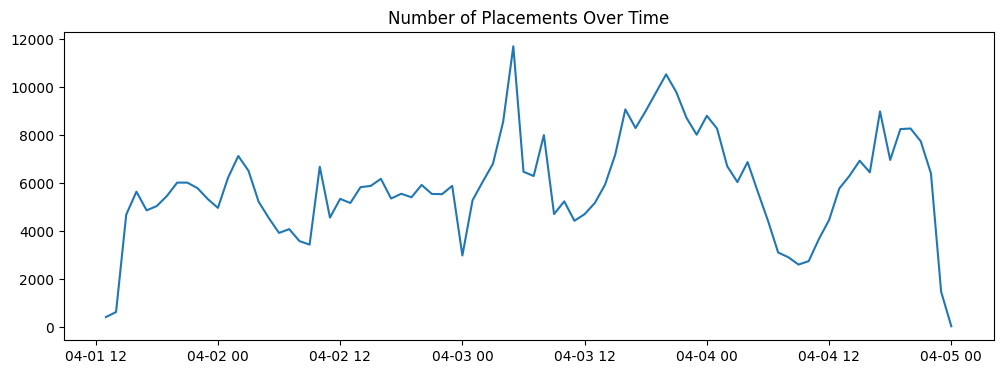

In [31]:
plt.figure(figsize=[12, 4])
plt.plot(df2_pandas["hour"],df2_pandas["num_placements"])
plt.title('Number of Placements Over Time')

In [32]:
spark.stop()